In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [201]:
def plot_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    return

In [182]:
def read_images(directory):
    file_list = os.listdir(directory)
    training_set = []
    testing_set = []
    for x in file_list:
        if int(x.split('.')[0].split('_')[1]) <= 6:
            training_set.append(x)
        else:
            testing_set.append(x)
    training_images=np.array([plt.imread(directory+'/'+image) for image in training_set], dtype=np.float64)
    testing_images=np.array([plt.imread(directory+'/'+image) for image in testing_set], dtype=np.float64)
    n_samples, h, w = training_images.shape
    return training_images,testing_images

In [183]:
train,test = read_images('p2_data')

train,test = read_images('p2_data')

In [155]:
def eig_face(samples):
    # shape1 = 56, shape2 = 46
    shape1,shape2 = samples.shape[1],samples.shape[2]
    samples = samples.reshape((samples.shape[0],shape1*shape2))
    sample_mean = np.mean(samples,axis = 0)
    # get covariance matrix
    covariance = np.cov((samples - sample_mean).T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    return sample_mean,shape1,shape2,eigenvalues,eigenvectors,covariance

(2576, 2576)


/Users/hsureggie/coding/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


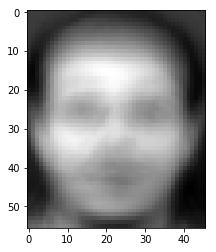

In [281]:
sample_mean,shape1,shape2,eigenvalues,eigenvectors,covariance = eig_face(train)
s_m = sample_mean.reshape((shape1,shape2))

# plot mean face
plt.imshow(s_m,cmap=plt.cm.gray)
print(eigenvectors.shape)
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx].astype(np.float64)
eigenvectors = eigenvectors.T

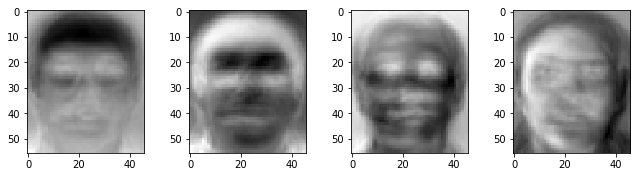

In [282]:
# plot first 4 eigenfaces
eigenfaces = eigenvectors.reshape((2576,56,46)).astype(np.float64)
plot_portraits(a, h=56, w=46, n_row=1, n_col=4)

In [286]:
def reconstruct(n_vectors,image_path,eigenfaces,meanface):
    h,w = 56,46
    image = np.array(plt.imread(image_path)).reshape((1,h*w))
    image = image - meanface
    recovered_images = []
    print(eigenfaces.shape)
    # image shape = (1,2576), C shape = (n_vectors[i],2576)
    for x in n_vectors:
        C = eigenfaces[:x].reshape((x,h*w))
        # weights shape = (1,n_vectors[i])
        weights = np.dot(image, C.T)
        # centered_vector shape = (1,2576)
        centered_vector=np.dot(weights, C)
        recovered_images.append((meanface+centered_vector).reshape(h, w))
    n_row,n_col = 1,4
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(recovered_images[i].reshape((h, w)), cmap=plt.cm.gray)
    return recovered_images
#     plt.imshow(recovered_image.reshape((h,w)),cmap=plt.cm.gray)

(2576, 56, 46)


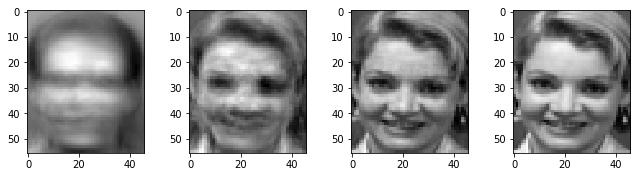

In [287]:
# given the number of eigenvectors/eigenfaces, reconstruct the image according to the vectors
recovered = reconstruct([3,45,140,229],'p2_data/1_1.png',eigenfaces,sample_mean)

0.006660676333680831
0.018109643874311094
0.02185729866918303
0.02214929405301671


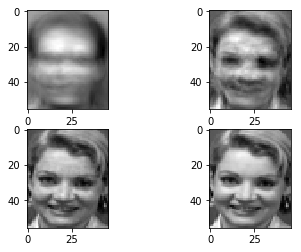

In [296]:
def mse_image(mean_image, recovered):
    n_row,n_col = 2,2
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(recovered[i].reshape((h, w)), cmap=plt.cm.gray)
    for img in recovered:
        mse = ((img.reshape((56*46))-mean_image)**2).mean()
        print(mse)
mse_image(sample_mean,recovered)